# Polar aurora forecasting
## 21.05.2019

## Task 1: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b> Reconstruct geomagnetic latitude of poleward, equatorward boundary of the auroral
oval, and equatorward boundary of the diffuse aurora for various values of auroral
electroject indices AL from small to huge, AL=-10,-100,-200,-300,-400,-500,-600,-
700,-800 for magnetic local time MLT=0,1,…,23</b>

In [2]:
AL_arr = [-10, -100, -200, -300, -400, -500, -600, -700, -800]
MLT_arr = range(24)

In [3]:
bAtab = np.array([
    [[-0.07, -10.06, -4.44, -3.77],
    [24.54, 19.83, 7.47, 7.90],
    [-12.53, -9.33, -3.01, -4.73],
    [2.15, 1.24, 0.25, 0.91]],
    
    [[1.61, -9.59, -12.07, -6.56],
    [23.21, 17.78, 17.49, 11.44],
    [-10.97, -7.20, -7.96, -6.73],
    [2.03, 0.96, 1.15, 1.31]],
    
    [[3.44, -2.41, -0.74, -2.12],
    [29.77, 7.89, 3.94, 3.24],
    [-16.38, -4.32, -3.09, -1.67],
    [3.35, 0.87, 0.72, 0.31]]
])

In [4]:
batab = np.array([
    [[-6.61, 6.37, -4.48],
    [10.17, -1.10, 10.16],
    [-5.80, 0.34, -5.87],
    [1.19, -0.38, 0.98]],
    
    [[-2.22, -23.98, -20.07],
    [1.50, 42.79, 36.67],
    [-0.58, -26.96, -24.20],
    [0.08, 5.56, 5.11]],
    
    [[-1.68, 8.69, 8.61],
    [-2.48, -20.73, -5.34],
    [1.58, 13.03, -1.36],
    [-0.28, -2.14, 0.76]]
])

$A_{im},\alpha_{im} = b_{0m} + b_{1m}log_{10}|AL| + b_{2m}log_{10}^2|AL| + b_{3m}log_{10}^3|AL|$

In [5]:
def A(i, m, AL):
    out = bAtab[m][0, i] + bAtab[m][1, i]*np.log10(abs(AL)) + bAtab[m][2, i]*(np.log10(abs(AL))**2) + bAtab[m][3, i]*(np.log10(abs(AL))**3)
    return out

In [6]:
def alpha(i, m, AL):
    out = batab[m][0, i-1] + batab[m][1, i-1]*np.log10(abs(AL)) + batab[m][2, i-1]*(np.log10(abs(AL))**2) + batab[m][3, i-1]*(np.log10(abs(AL))**3)
    return out

$\Theta = A_{0m} + A_{1m}cos(15(t + \alpha_{1m})) + A_{2m}cos(15(2t + \alpha_{2m})) + A_{3m}cos(15(3t + \alpha_{3m}))$<br>
<b>i = 1, 2, 3<br>
t = 0, 1, ... , 23<br>
m = 0 - Poleward boundary<br>
m = 1 - Equatorward boundary<br>
m = 3 - Diffusive aurora boundary</b>

In [7]:
def Theta(m, t, AL):
    return A(0, m, AL) + A(1, m, AL)*np.cos(np.pi/180*15*(t + alpha(1, m, AL))) +  A(2, m, AL)*np.cos(np.pi/180*15*(2*t + alpha(2, m, AL))) +  A(3, m, AL)*np.cos(np.pi/180*15*(3*t + alpha(3, m, AL)))

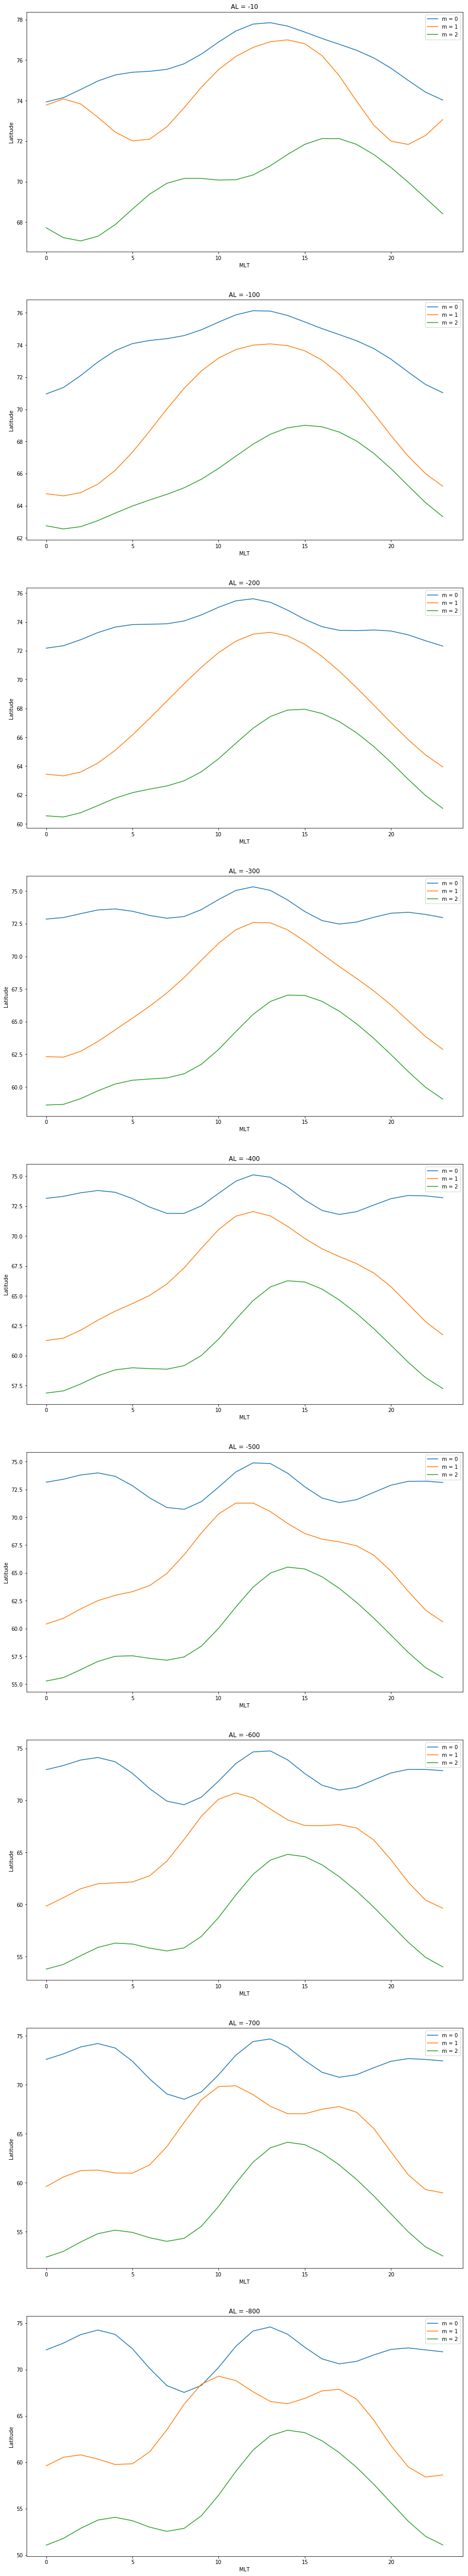

In [8]:
plt.figure(figsize=(15, 100))

for i in range(len(AL_arr)):
    kek0 = []
    for j in MLT_arr:
        kek0.append(90 - Theta(0, j, AL_arr[i]))
    kek1 = []
    for j in MLT_arr:
        kek1.append(90 - Theta(1, j, AL_arr[i]))
    kek2 = []
    for j in MLT_arr:
        kek2.append(90 - Theta(2, j, AL_arr[i]))
    plt.subplot(len(AL_arr)+1, 1, i+1)
    plt.plot(MLT_arr, kek0, label = 'm = 0')
    plt.plot(MLT_arr, kek1, label = 'm = 1')
    plt.plot(MLT_arr, kek2, label = 'm = 2')
    plt.xlabel('MLT')
    plt.ylabel('Latitude')
    plt.legend()
    plt.title('AL = %d'%AL_arr[i])

plt.show()

### From the graphs, it can be seen that the larger the module AL, the higher the latitude.

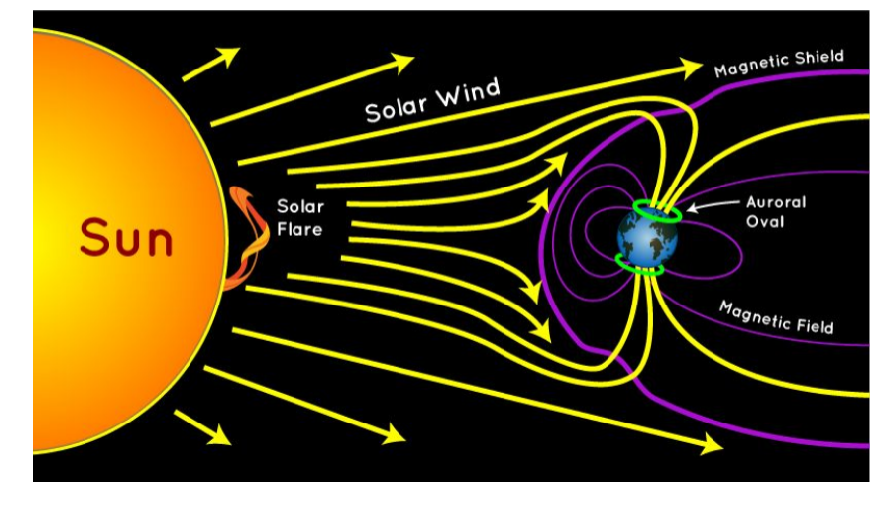

In [9]:
plt.figure(figsize=(15, 10))
plt.imshow(plt.imread('./img.PNG'))
plt.axis('off')
plt.show()

### From this image we can get that the lowest aurora borealis occur in those places with geographic midnight. This is due to the influence of the solar wind on the magnetic shield of the earth.

## TASK 2

In [10]:
data = np.loadtxt('./omni2_18497.lst.txt')

### Kp reconstruction:
$AL = c_0 + c_1Kp + c_2Kp^2 + c_3Kp^3$

In [11]:
day = data[:, 1]
hour = data[:, 2]
x_x = day*24 + hour
By = data[:, 5]
Bz = data[:, 6]
V = data[:, 7]
Kp = data[:, 8]
AL_fromdata = data[:, 9]
alp = 0.0044
tmp = np.sqrt(By**2+Bz**2)
tmp[tmp==0] = 1
theta = np.arccos(Bz/tmp)
ALkp = (18 - 12.3*Kp + 27.2*Kp**2 - 2*Kp**3)/300

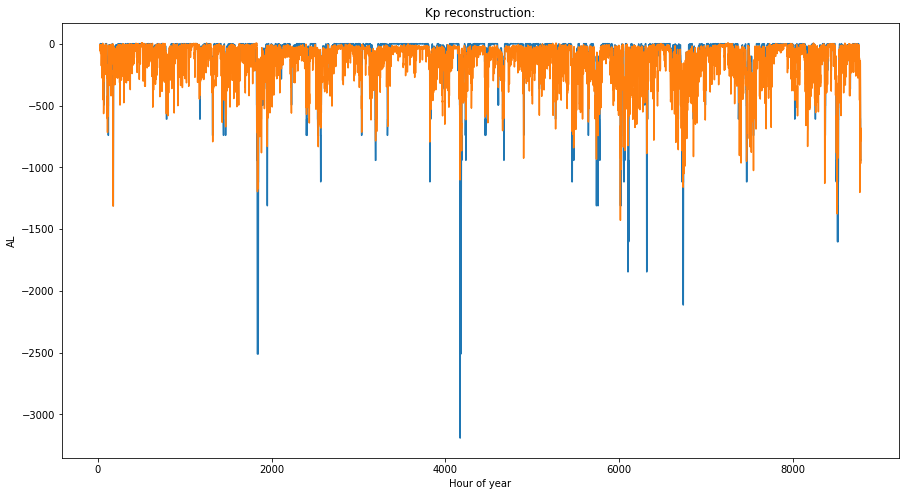

In [12]:
plt.figure(figsize=(15,8))
plt.plot(x_x, ALkp)
plt.plot(x_x, AL_fromdata)
plt.xlabel('Hour of year')
plt.ylabel('AL')
plt.title('Kp reconstruction:')
plt.show()

In [13]:
er1 = np.average(np.sqrt(np.abs(ALkp**2 - AL_fromdata**2)))
print 'Average error =', er1

Average error = 141.1064484460439


### Solar wind data reconstruction:
$E = V \sqrt{\frac{B_y^2}{2} + B_z^2}\cdot {sin}^4(\frac{\Theta}{2}) + \alpha \cdot V^2 {sin}^{0.5}(\frac{\Theta}{2})$

<b>$V$ - solar wind speed, km/s<br>
$B_y^2, B_z^2$ - Components of interplanetary magnetic field (IMF)<br>
$\Theta = acos \left( \frac{B_z}{\sqrt{B_y^2 + B_z^2}}\right)$ - IMF clock angle<br>
$\alpha = 0.0044$

In [14]:
E = V*np.sqrt(By**2/2 + Bz**2)*(np.sin(theta/2)**4) + alp * V**2 * np.sin(theta/2)**0.5

In [15]:
E185 = np.zeros(len(E)-2)

In [16]:
for i in range(len(E185)):
    E185[i] = (E[i] + 8*E[i+1] + 5*E[i+2])/14

$E185 = (E_{-2} + 8E_{-1} + 5E_{0})/14$<br>
$AL = c_1log_{10}(E185) + c_2log_{10}^2(E185) + c_3log_{10}^3(E185) + c_4log_{10}^4(E185) + c_5$<br>
Coefficients we'll find using Polyfit

In [17]:
lg = np.log10(E185)
c = np.polyfit(lg,AL_fromdata[2:], 4)

In [18]:
AL185 = c[0]*lg**4 + c[1]*lg**3 + c[2]*lg**2 + c[3]*lg + c[4]

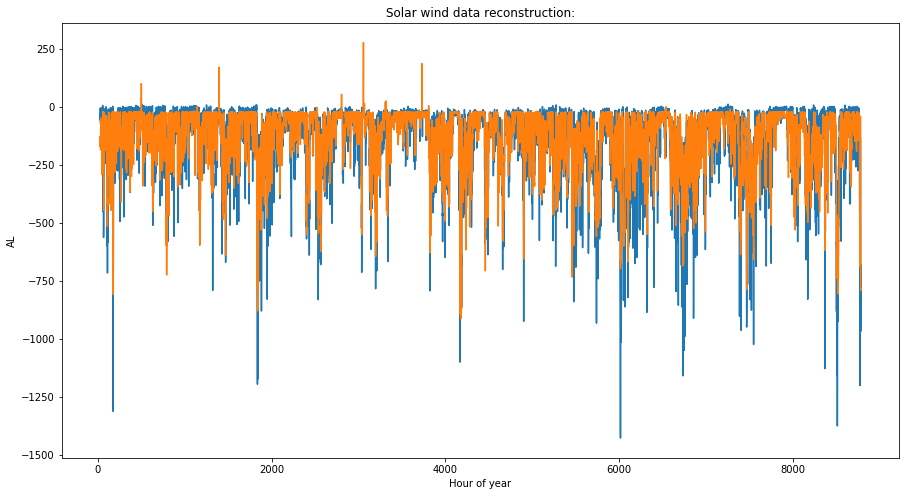

In [19]:
plt.figure(figsize=(15,8))
plt.plot(x_x[2:], AL_fromdata[2:])
plt.plot(x_x[2:], AL185)
plt.xlabel('Hour of year')
plt.title('Solar wind data reconstruction:')
plt.ylabel('AL')
plt.show()

In [20]:
er2 = np.average(np.sqrt(np.abs(AL185**2 - AL_fromdata[2:]**2)))
print 'Average error =', er2

Average error = 115.06395490556157


#### Comparing the results we get that the second method of forecasting is not much, but still more accurate.